## Week by week
In **Module One**, you will be introduced to basic machine learning concepts, tasks, and workflow using an example classification problem based on the K-nearest neighbors method, and implemented using the scikit-learn library. This week’s assignment has you work through the process of loading and examining a dataset, training a k-nearest neighbors classifier on the dataset, and then evaluating the accuracy of the classifier and using it to classify new data.

In **Module Two**, you will delve into a wider variety of supervised learning methods for both classification and regression, learning about the connection between model complexity and generalization performance, the importance of proper feature scaling, and how to control model complexity by applying techniques like regularization to avoid overfitting.  In addition to k-nearest neighbors, this week covers linear regression (least-squares, ridge, lasso, and polynomial regression), logistic regression, support vector machines, decision trees, and the use of cross-validation for model evaluation.  For this week’s assignment, you’ll explore the relationship between model complexity and generalization performance, by looking at the effect of key parameters on the accuracy of different classification and regression models.

In **Module Three**, you will cover evaluation and model selection methods that you can use to help understand and optimize the performance of your machine learning models. For this week’s assignment, you will train a classifier to detect fraudulent financial transactions, analyze its performance with different evaluation metrics, and then optimize the classifier’s performance based on different evaluation metrics, depending on the goals of the detection task (e.g. to minimize false positives vs false negatives).

In **Module Four**, you will cover more advanced supervised learning methods that include ensembles of trees (random forests, gradient boosted trees), and neural networks (with an optional summary on deep learning).  You will also learn about the critical problem of data leakage in machine learning and how to detect and avoid it.  The final assignment brings everything together: you will design features for, and build your own classifier on, a prediction problem on a complex real-world dataset.

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [7]:
fruits = pd.read_table('data/fruit_data_with_colors.txt')
fruits.head()
# `fruit_label` | `fruit_name` | `fruit_subtype` won't be used in our model,
# they just included here to make the dataset more readable.

# color_score : is measuring a color using a scale from 0 to 1 representing
# the fruit's color degree.

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [8]:
# the number of items that have been measured and entered to the table.
fruits.shape

(59, 7)

In [18]:
# we want o get the label of each fruit associated with it.
fruits_label_name = zip(fruits.fruit_label.unique() , fruits.fruit_name.unique())
# to show what is in zip object we need to iterate over it.
for i in fruits_label_name:
    print(i)
# OR, we can spill it into dictionary instead.   
fruits_label_name = dict(zip(fruits.fruit_label.unique() , fruits.fruit_name.unique()))
fruits_label_name

# REASON: to set the classifier pridiction to something more readable.

(1, 'apple')
(2, 'mandarin')
(3, 'orange')
(4, 'lemon')


{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

**So our goal here is to build a classifier from this data that can predict the correct type of fruit for any given observation of its features such as mass, height, width, and color score.**

To estimate how well the classifier will do on future samples, what we'll do is split the original dataset into two parts. We'll have an array of labeled samples called the training set that will be used to train the classifier. And then we'll hold out the remaining labeled samples and put them into a second separate array called the test set that will be used to then evaluate the trained classifier.

## Create train_test split

In [69]:
# Now , we'll create X(capital) the features & y(small) the fruit label.
X = fruits[['mass','width','height','color_score']]
y = fruits['fruit_label']

# 75% of the data is used to train and 25% to test.
# random_state= provides a seed value of the random numbers generators.
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=0)

## Examining the data Before `applying` Tainning.

<IPython.core.display.Javascript object>


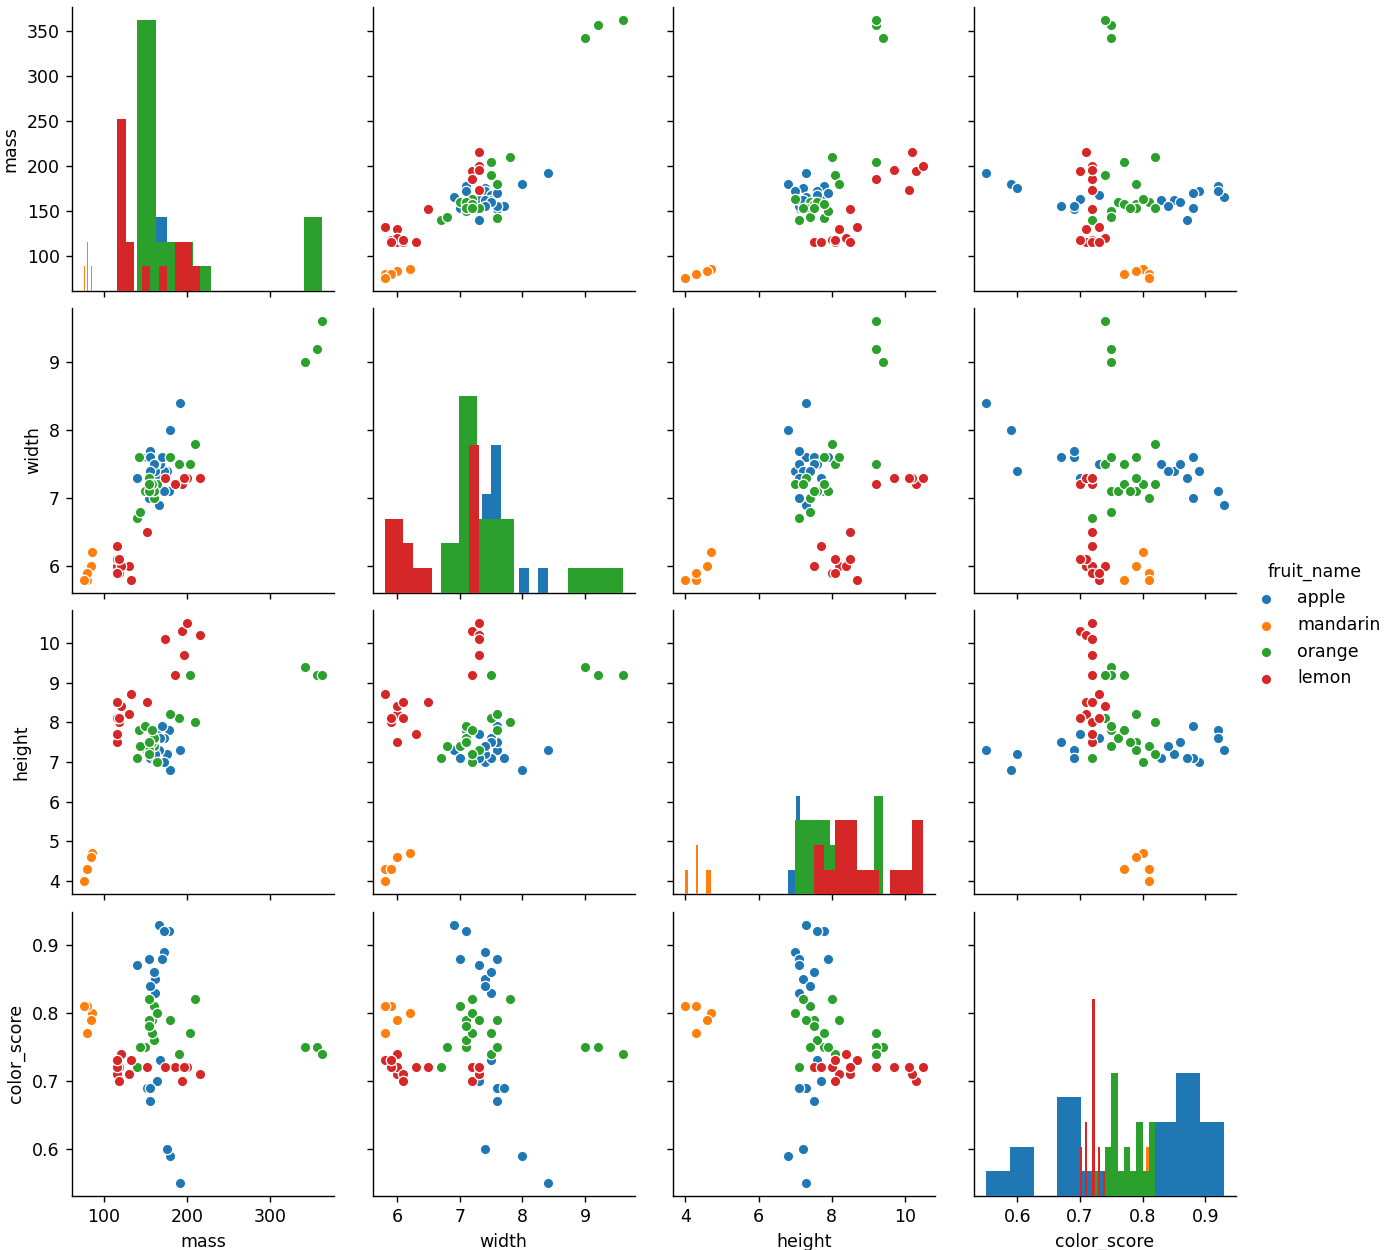

In [70]:
# this plot for the whole dataset before cutting them off x&y and so forth.
import seaborn as sns
fruits_c = fruits[['fruit_name','mass','width','height','color_score']]
sns.pairplot(fruits_c, hue = 'fruit_name',diag_kind='hist');

<IPython.core.display.Javascript object>


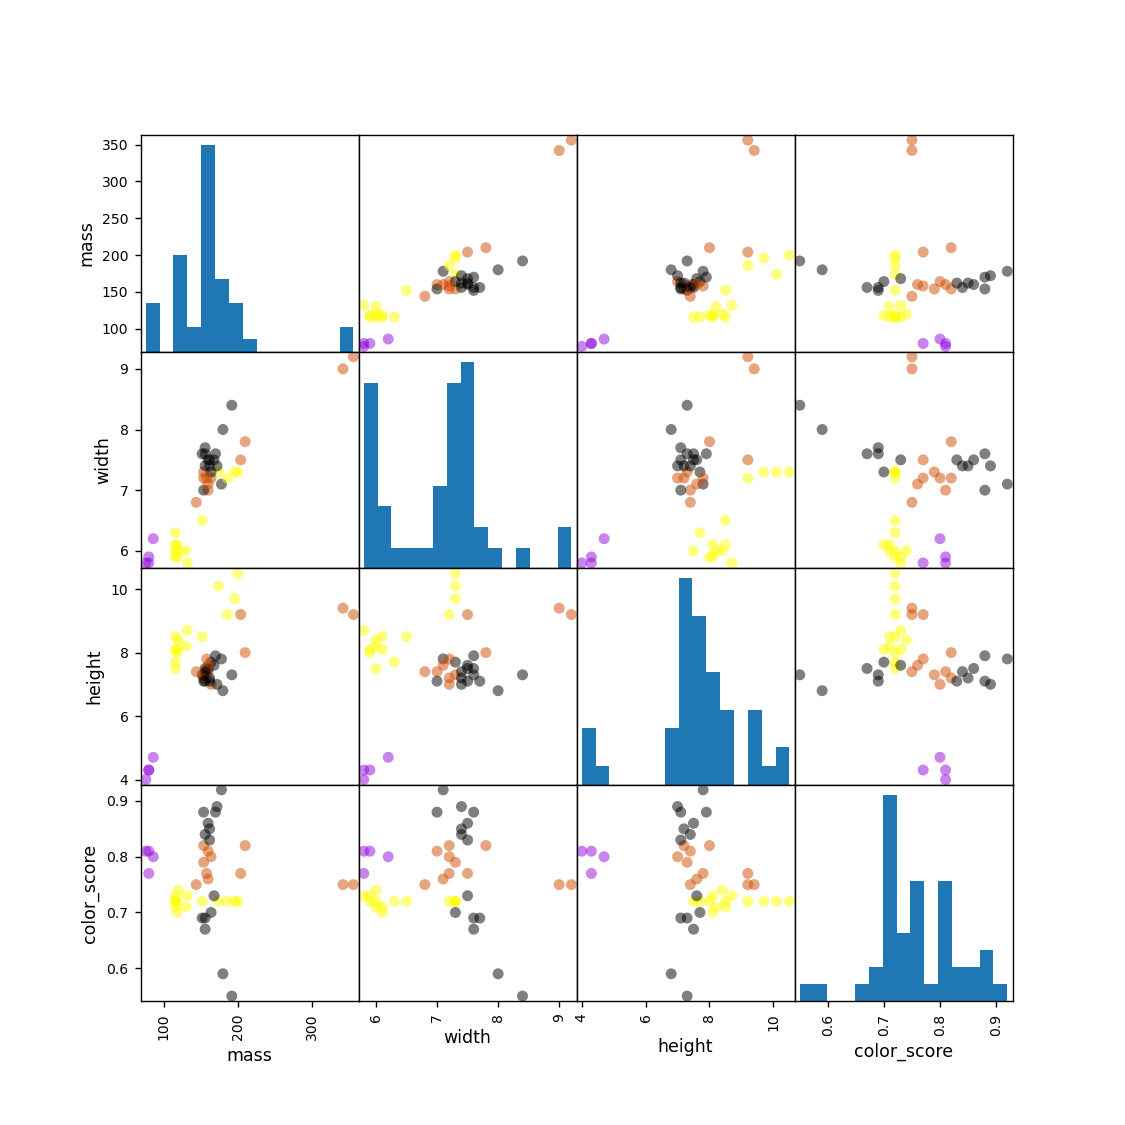

In [65]:
# we want to plot X_train data and make the color varys according to Y_train
# which holds the labels.
from matplotlib import cm
cmap =  cm.get_cmap('gnuplot')
pd.plotting.scatter_matrix(X_train, c = y_train, marker = 'o',cmap = cmap,
                          s=40,figsize=(9,9) , hist_kwds={'bins':15});

- Just by looking at this pair plot, we can already see that some pairs of features, like the **height and color score** in the top right corner here, are good for separating out different classes of fruit. And this suggests that a classifier that was trained using those features could likely learn to classify the various fruit types reasonably well.

<IPython.core.display.Javascript object>


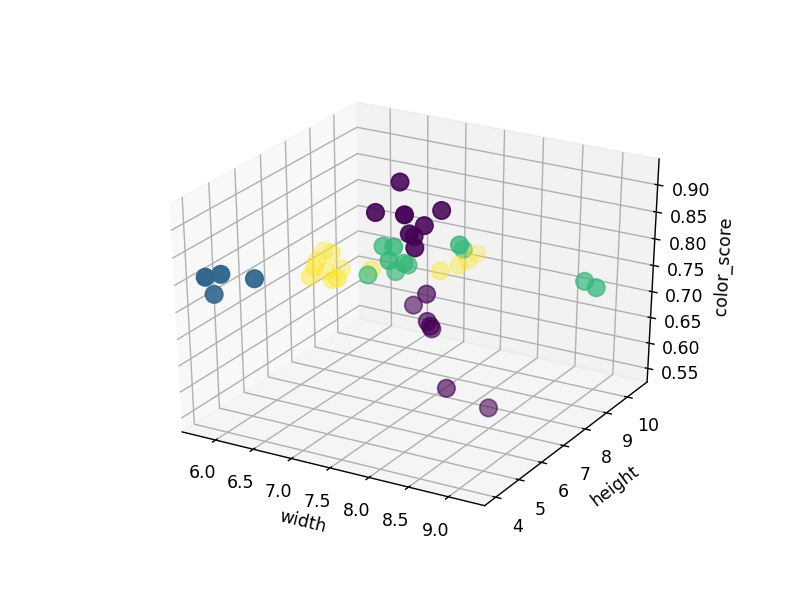

In [80]:
# lets delve more into height and color_score in 3D plot
fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(X_train['width'],X_train['height'],X_train['color_score'],
          c = y_train , s=100)

ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score');

## K-Nearest Neighbors Classification

In [115]:
# REASON: to set the classifier pridiction to something more readable.
lookup_fruit_name = dict(zip(fruits.fruit_label.unique() , fruits.fruit_name.unique()))

# train-test split
X = fruits[['mass','width','height']]
y = fruits['fruit_label']

# usually this step is took place randomly but to make sure that
# we'll get the same result as the instructor we made random_state=0.
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=0)

### Create classifier Object.

In [116]:
from sklearn.neighbors import KNeighborsClassifier

# set the K which means how many neighbors the classifier use to determine 
# the unseen item.
knn = KNeighborsClassifier(n_neighbors = 5)

### Train the classifier (fit the estimator) using the trainning data.

In [117]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

### Estimate the accuracy of the classifier on future,using the test data.

In [118]:
knn.score(X_test,y_test)

0.5333333333333333

### Use the trained K-NN classifier model to classify new, previously unseen object, which is our aim in the first place.

In [119]:
# 'mass','width','height'
fruit_prediction = knn.predict([[20, 4.3, 5.5]])
print(fruit_prediction) # this brigs (label, its dtype).
# the name of the label would be better choice, so 
# lets extract name from the dic.
lookup_fruit_name[fruit_prediction[0]]

[2]


'mandarin'

In [120]:
# 'mass','width','height'
fruit_prediction = knn.predict([[100, 6.3, 8.5]])
lookup_fruit_name[fruit_prediction[0]]

'lemon'

### Plot the decision boundaries of the K-NN classifier.

In [ ]:
#AttributeError: 'DataFrame' object has no attribute 'as_matrix'
from adspy_shared_utilities import plot_fruit_knn
plot_fruit_knn(X_train, y_train, 5, 'uniform')
# the result should be :

![fruit_prediction_ML_PLOT](fruit_prediction_ML_PLOT.png)

### we can examine how the variation in the K value might affects the Classification accuracy.
### How sensitive is k-NN classification accuracy to the choice of the 'k' parameter?

<IPython.core.display.Javascript object>


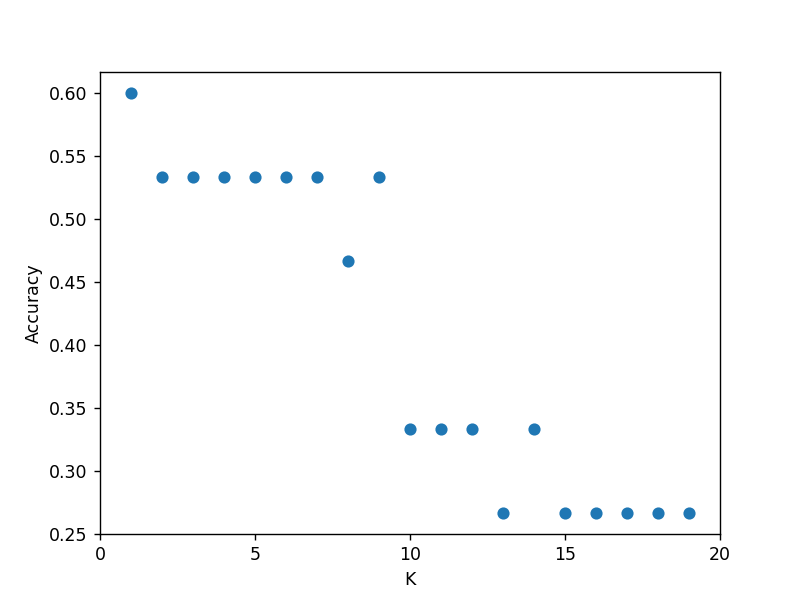

In [135]:
k_range = range(1,20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    scores.append(knn.score(X_test,y_test))

plt.figure()
plt.scatter(k_range,scores)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.xticks([0,5,10,15,20]);

**Steps**
#1 `read_table`, #2 `train_test_split`, #3 `KNeighborsClassifier`, #4 `fit`, #5 `score`

**Notes:**
1. A low value of “k” (close to 1) is more likely to overfit the training data and lead to worse accuracy on the test data, compared to higher values of “k”.

2. Setting “k” to the number of points in the training set will result in a classifier that always predicts the majority class.

3. The performance of a k-nearest neighbors classifier is relatively insensitive to the choice of “k” on most datasets.

## How sensitive is k-NN classification accuracy to the train/test split proportion?

<IPython.core.display.Javascript object>


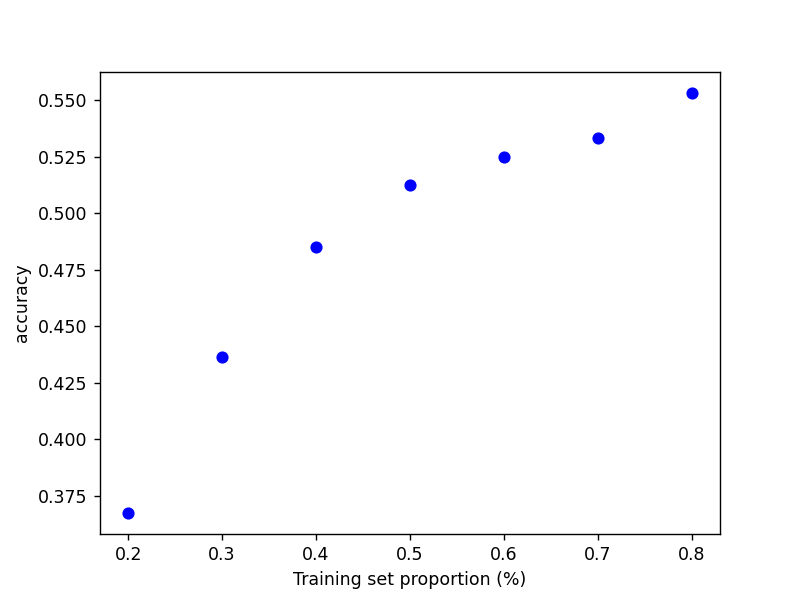

In [136]:
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 5)

plt.figure()

for s in t:

    scores = []
    for i in range(1,1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');